In [5]:
import numpy as np
from sklearn.cluster import MeanShift,estimate_bandwidth
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.datasets import make_blobs

In [6]:
centers = [[1,1],[-1,-1],[1,-1]]
X,_ = make_blobs(n_samples=10000, centers=centers, cluster_std=6)

In [8]:
bandwidth = estimate_bandwidth(X,quantile=0.2,n_samples=500)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of estimated clusters : %d" %n_clusters_)

Number of estimated clusters : 3


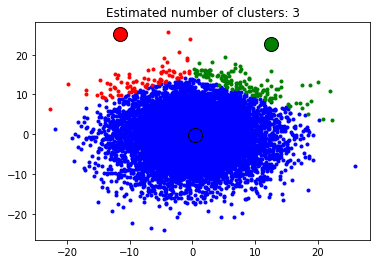

In [12]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_),colors):
                  my_members = k == labels
                  cluster_center =cluster_centers[k]
                  plt.plot(X[my_members,0],X[my_members,1],col + '.')
                  plt.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=14)
plt.title("Estimated number of clusters: %d" %n_clusters_)
plt.show()